In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 逻辑回归

## 1.1、显示数据

In [2]:
path='ex2data1.txt'
data = pd.read_csv(path,header=None,names=['Exam1','Exam2','Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
print(positive.head())
print(negative.head())

       Exam1      Exam2  Admitted
3  60.182599  86.308552         1
4  79.032736  75.344376         1
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
        Exam1      Exam2  Admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
5   45.083277  56.316372         0
10  95.861555  38.225278         0


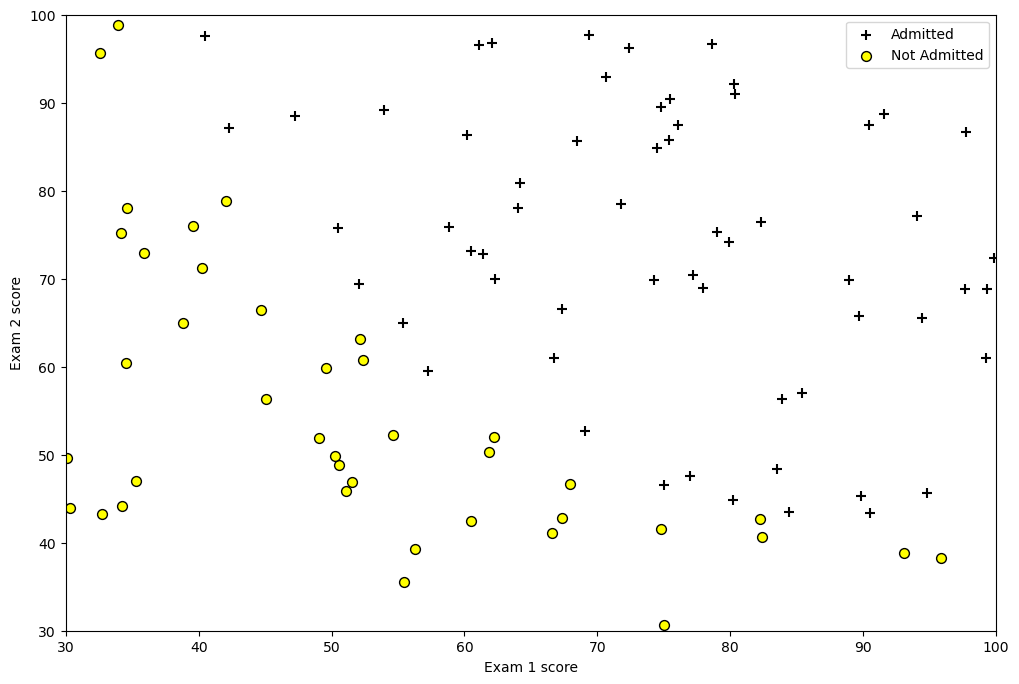

In [4]:
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'],positive['Exam2'],label='Admitted',s=50,c='black',marker='+')
ax.scatter(negative['Exam1'],negative['Exam2'],label='Not Admitted',s=50,edgecolor='black',c='yellow',marker='o')
ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.set_xlim(30,100)
ax.set_ylim(30,100)
plt.show()

## 1.2、实现

1.2.1 sigmoid function

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

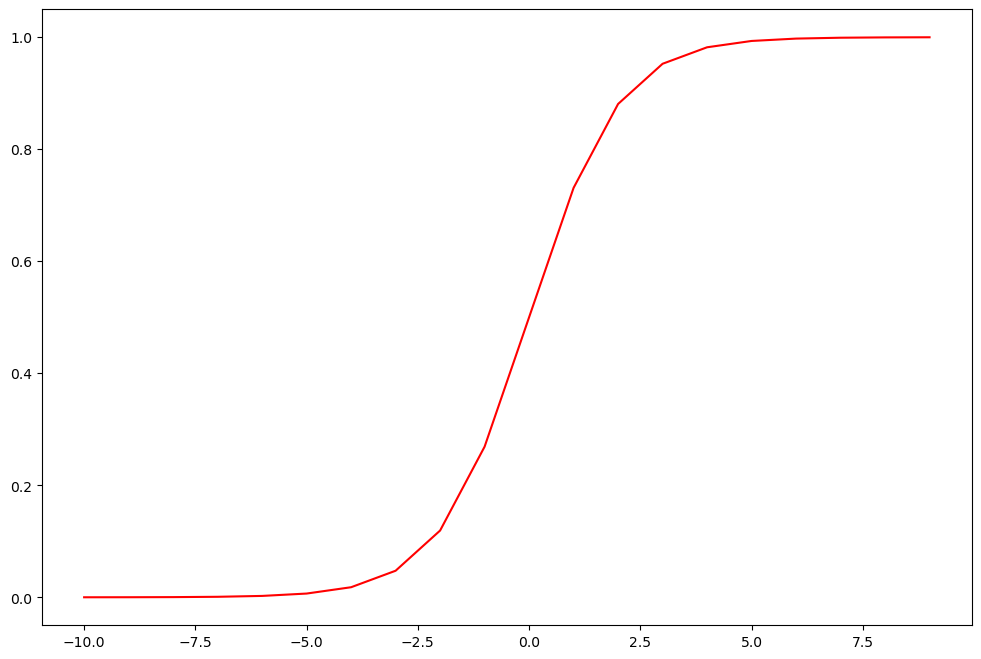

In [6]:
nums = np.arange(-10,10,step=1)
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(nums,sigmoid(nums),'r')
plt.show()

1.2.2 代价函数和偏导数

$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$

In [7]:
def cost(theta,X,y):
    """
        根据给定的θ，计算总样本的损失
    """
    #是个行向量
    theta = np.matrix(theta)
    #X每行是一个样本
    X=np.matrix(X)
    y=np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply(1-y,np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/len(X)

In [8]:
#分割X，y,theta
data.insert(0,'Ones',1)
cols=data.shape[1]
X=data[['Ones','Exam1','Exam2']]
y=data.iloc[:,cols-1:cols]

X=np.array(X.values)
y=np.array(y.values)

theta=np.zeros(3)


In [9]:
X.shape,y.shape,theta.shape

((100, 3), (100, 1), (3,))

In [10]:
cost(theta,X,y)

0.6931471805599453

计算偏导数：
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [11]:
def gradient(theta,X,y):
    """
        根据给定的theta，计算J（Θ）对应于每个θ的偏导数
        @return 偏导数的列表
    """
    #是个行向量
    theta = np.matrix(theta)
    #X每行是一个样本
    X=np.matrix(X)
    y=np.matrix(y)
    
    #计算n+1个关于THETA的偏导数
    parameters = int(theta.ravel().shape[1])
    #存储n+1个偏导数在theta值集上的值
    grad = np.zeros(parameters)
    
    error = sigmoid(X*theta.T) -y
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        grad[i] = np.sum(term)/len(X)
    return grad

In [12]:
gradient(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

现在可以用SciPy's truncated newton（TNC）实现寻找最优参数。

In [13]:
import scipy.optimize as opt
result = opt.fmin_tnc(func = cost,x0=theta,fprime=gradient,args=(X,y))
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [14]:
cost(result[0],X,y)

0.20349770158947458

用学得的参数θ生成模型做预测

\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\]

In [15]:
def predict(theta,X):
    probability = sigmoid(X*theta.T)
    return [1 if x>=0.5 else 0 for x in probability]

In [16]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min,X)
correct = [1 if (a==1 and b==1) or (a==0 and b==0) else 0 for (a,b) in zip(predictions,y)]
accuracy = sum(map(int,correct)) / len(correct)
print('accuracy = {0}%'.format(accuracy))
len(correct)


accuracy = 0.89%


100

# 2、正则化逻辑回归

In [17]:
path='ex2data2.txt'
data = pd.read_csv(path,header=None,names=['Test1','Test2','Admitted'])
data.head()

,Test1,Test2,Admitted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


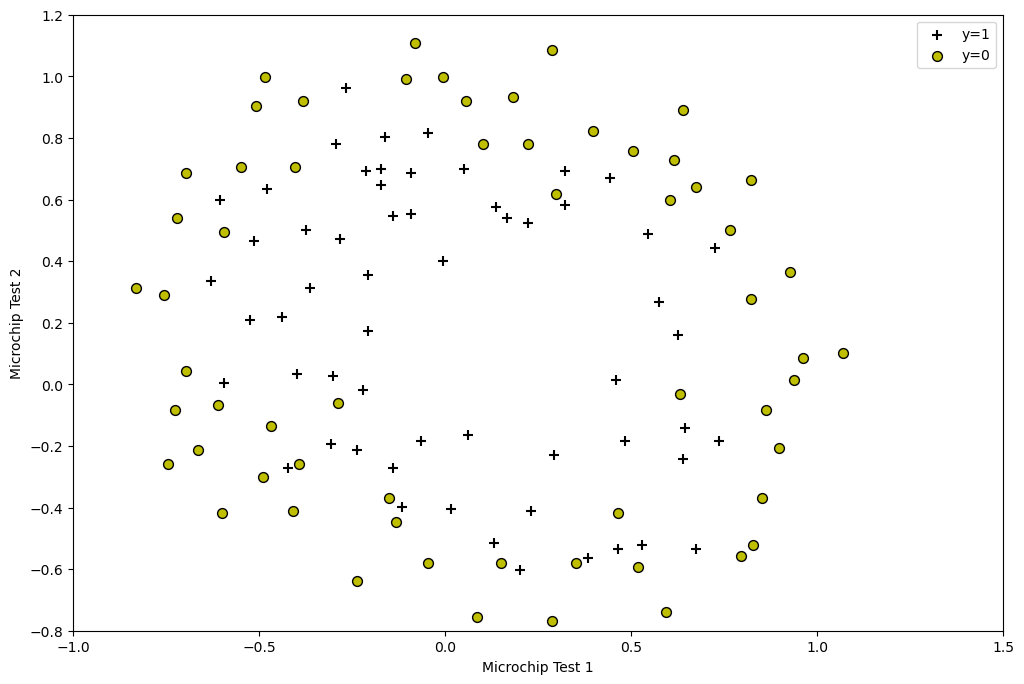

In [18]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'],positive['Test2'],label='y=1',s=50,c='black',marker='+')
ax.scatter(negative['Test1'],negative['Test2'],label='y=0',s=50,edgecolor='black',c='y',marker='o')
ax.legend()
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
ax.set_xlim(-1,1.5)
ax.set_ylim(-0.8,1.2)
ax.set_yticks(np.arange(-0.8,1.3,0.2))
plt.show()           
    

## 特征映射
    逻辑回归只能找到线性决策边界，为了能找到更好的决策边界，可以把特征映射到x1，x2的所有多项式中。但容易产生过拟合问题，因为边界浮动比较大，不够线性。

In [19]:
# 创建一组多项式特征值
degree = 5
x1 = data['Test1']
x2 = data['Test2']
data.insert(3,'Ones',1)
for i in range(1,degree):
    for j in range(0,i):
        data['F'+str(i)+str(j)] = np.power(x1,i-j)*np.power(x2,j)
data.drop('Test1', axis=1, inplace=True)
data.drop('Test2', axis=1, inplace=True)

data.head()

,Admitted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


# 正则化代价函数

$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [20]:
def costReg(theta,X,y,learningRate):
    """
        逻辑回归代价函数，直接添加正则项即可
    """
    #是个行向量
    theta = np.matrix(theta)
    #X每行是一个样本
    X=np.matrix(X)
    y=np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply(1-y,np.log(1-sigmoid(X*theta.T)))
    reg = (learningRate / (2*len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]],2))
           
    return np.sum(first-second) / len(X) + reg

如果我们要使用梯度下降法令这个代价函数最小化，因为我们未对${{\theta }_{0}}$ 进行正则化，所以梯度下降算法将分两种情形：
\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

对上面的算法中 j=1,2,...,n 时的更新式子进行调整可得： 
${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$

In [21]:
def gradientReg(theta,X,y,learningRate):
    """
        根据给定的theta，计算J（Θ）对应于每个θ的偏导数
        @return 偏导数的列表
    """
    #是个行向量
    theta = np.matrix(theta)
    #X每行是一个样本
    X=np.matrix(X)
    y=np.matrix(y)
    
    #计算n+1个关于THETA的偏导数
    parameters = int(theta.ravel().shape[1])
    #存储n+1个偏导数在theta值集上的值
    grad = np.zeros(parameters)
    
    error = sigmoid(X*theta.T) -y
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        
        if(i==0):
            grad[i] = np.sum(term)/len(X)
        else:
            grad[i] = (np.sum(term)/len(X))+(learningRate/len(X))*theta[:,i]
    return grad

In [22]:
cols = data.shape[1]
X = data.iloc[:,1:cols]
y = data.iloc[:,0:1]

X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(11)

In [23]:
#初始化学习率
learningRate = 1

In [24]:
costReg(theta,X,y,learningRate)

0.6931471805599454

In [25]:
gradientReg(theta,X,y,learningRate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [26]:
#用优化函数直接计算优化后的结果，不用梯度下降
result = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y, learningRate))
result

(array([ 0.53010247,  0.29075567, -1.60725764, -0.58213819,  0.01781027,
        -0.21329507, -0.40024142, -1.3714414 ,  0.02264304, -0.95033581,
         0.0344085 ]),
 22,
 1)

In [27]:
#查看在训练集上的准确性
theta_min = np.matrix(result[0])
predictions = predict(theta_min,X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = sum(correct) / len(correct)
print ('accuracy = {0}%'.format(accuracy))

accuracy = 0.6610169491525424%


# 我们可以使用python高级库

In [28]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2',C=1.0)
model.fit(X,y.ravel())

LogisticRegression()

In [29]:
model.score(X,y)

0.6610169491525424